# Data visualisation with python

Let's import the libraries and datasets we need:

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [3]:
path = 'D:/Bootcamp Data Science/Bootcamp/Projects/Code/clean/clean/'
orderlines = pd.read_csv(path + 'orderlines_cl.csv')
orders = pd.read_csv(path + 'orders_cl.csv')
brands = pd.read_csv(path + 'brands_cl.csv')
products = pd.read_csv(path + 'products_cl.csv')
products_final =pd.read_csv('products_final.csv')

In [ ]:
products.head()

Transform to date format the columns from orders and orderlines:

In [4]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])
#orderlines.info()
products_cl = pd.read_csv('products_cl.csv')
#brands

In [5]:
products['price'].mean()

667.3462680144781

## Company revenue

First I will need to filter only the orders that have a completed state: 

In [6]:
orders_compl = orders.query('state == "Completed"')

Before we create a visualisation, we always need to prepare our dataframe: 

In [7]:
p_df = (
orders_compl
    # create two new columns in our dataframe; year and month
    .assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'),
           day = orders['created_date'].dt.strftime('%a'))
    # get the total paid by each year and month
    .groupby(['year','month','day'])
    .agg({'total_paid':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)
p_df

,year,month,day,total_paid
0,2017,Apr,Fri,74276.34
1,2017,Apr,Mon,106226.08
2,2017,Apr,Sat,50788.25
3,2017,Apr,Sun,43879.30
4,2017,Apr,Thu,65710.35
...,...,...,...,...
100,2018,Mar,Sat,25766.81
101,2018,Mar,Sun,45806.45
102,2018,Mar,Thu,88669.87
103,2018,Mar,Tue,78312.03


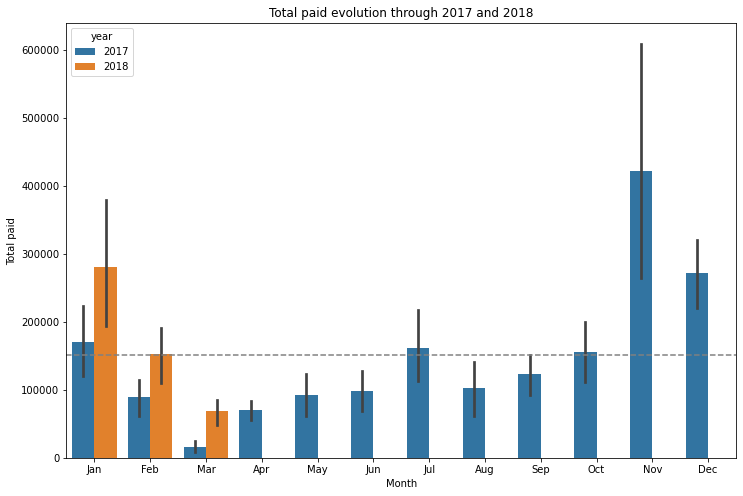

In [8]:
# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define de size of the plot: 12 with be the width, and 8 the height
plt.subplots(figsize=(12, 8))


p = sns.barplot(
    data=p_df, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='total_paid', # y values on our chart
    hue='year', # group color in our chart
    order=months # order x columns
)
# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(
    p_df['total_paid'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)

plt.xlabel('Month') # x label name
plt.ylabel('Total paid') # y label name
plt.title('Total paid evolution through 2017 and 2018') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

### Revenue distribution by order id

I would like to know more about the different values of `total_paid` for each order by month.

Let's talk more about this concept: 

In [9]:
p_df = (
orders_compl
    # create year and month
    .assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'))
)
p_df

,order_id,created_date,total_paid,state,check_orders,year,month
1,241423,2017-11-06 13:10:02,136.15,Completed,True,2017,Nov
2,242832,2017-12-31 17:40:03,15.76,Completed,True,2017,Dec
3,243330,2017-02-16 10:59:38,84.98,Completed,True,2017,Feb
5,245275,2017-06-28 11:35:37,149.00,Completed,True,2017,Jun
6,245595,2017-01-21 12:52:47,112.97,Completed,True,2017,Jan
...,...,...,...,...,...,...,...
204403,527042,2018-03-14 11:47:50,18.98,Completed,True,2018,Mar
204423,527070,2018-03-14 11:50:48,24.97,Completed,True,2018,Mar
204426,527074,2018-03-14 11:51:42,24.97,Completed,True,2018,Mar
204444,527096,2018-03-14 11:58:40,34.96,Completed,True,2018,Mar


If we create a barplot directly: 

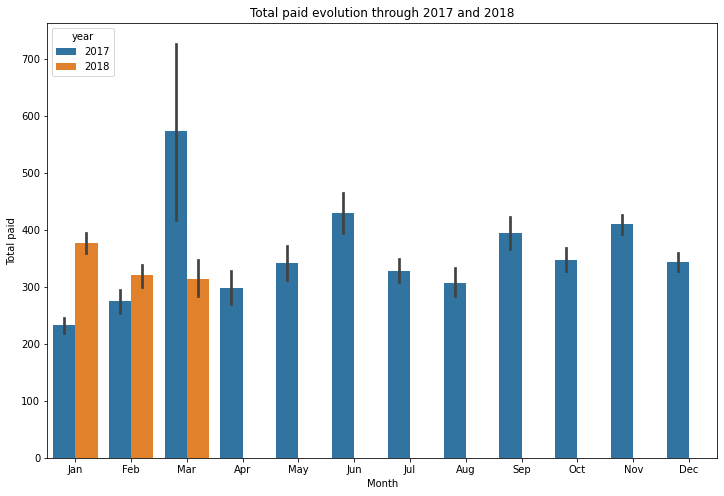

In [10]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.subplots(figsize=(12, 8))

sns.barplot(data=p_df, x='month', y='total_paid', hue='year', order=months)

plt.xlabel('Month')
plt.ylabel('Total paid')
plt.title('Total paid evolution through 2017 and 2018')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Look at the description of `?sns.barplot` to undersand more about the chart. What's the meaning of the dark lines on top of each bar?

A better way to see the distribution by month would be to use another type of chart; the boxplot. 

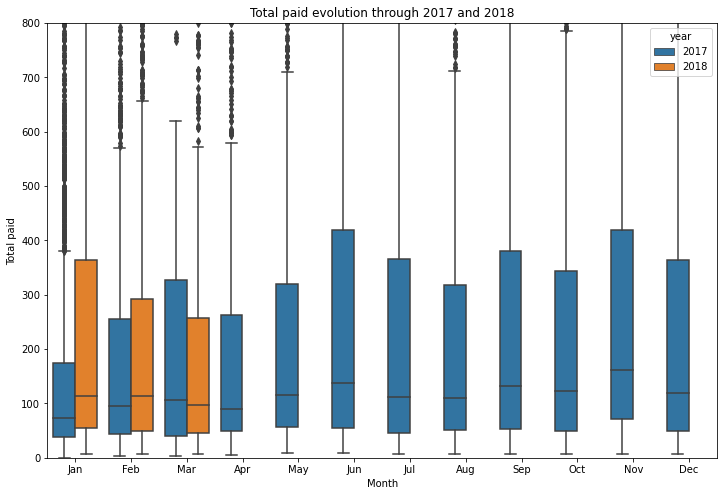

In [11]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.subplots(figsize=(12, 8))

sns.boxplot(data=p_df, x='month', y='total_paid', hue='year', order=months)

plt.ylim(0, 800) # define a limit to put focus on your chart
plt.xlabel('Month')
plt.ylabel('Total paid')
plt.title('Total paid evolution through 2017 and 2018')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

What I am seeing on this chart? Well, the [boxplot](https://en.wikipedia.org/wiki/Box_plot) is a representaition of the pandas function `.describe()`. It shows the main descriptive statistics of a distribution. 

In [12]:
(
p_df
    # select this 3 columns
    .filter(['year','month','total_paid'])
    # apply the describe function to this two groups
    .groupby(['year','month'])
    .describe()
)

total_paid                                                 
                count   mean     std  min   25%    50%    75%      max
year month                                                            
2017 Apr      1632.00 298.38  614.30 4.99 49.99  89.99 262.98  9423.90
     Aug      2350.00 307.26  599.39 7.78 51.10 109.99 317.23 10586.97
     Dec      5506.00 344.63  585.87 6.98 49.98 119.98 362.97  6657.46
     Feb      2273.00 274.48  520.73 3.99 42.98  94.97 254.98  4163.98
     Jan      5111.00 233.11  522.33 0.00 37.93  72.96 174.98  7230.97
     Jul      3438.00 327.86  602.56 7.48 44.98 110.97 365.99  7216.77
     Jun      1603.00 430.47  752.93 8.89 54.98 137.98 419.98  6698.00
     Mar       202.00 573.95 1208.63 2.82 39.99 106.98 326.74  9987.76
     May      1892.00 341.52  594.72 8.98 56.25 115.00 318.96  5335.00
     Nov      7187.00 410.39  683.62 6.53 71.48 161.23 418.98 13387.78
     Oct      3135.00 346.99  610.90 6.98 49.98 122.24 344.07  6227.77
     Sep      2180.00 395.04  682.26 6.98 52.20 131.78 380.38  7376.58
2018 Feb      3334.00 320.85  587.50 6.98 49.98 113.97 292.98  6034.97
     Jan      5202.00 376.94  665.62 6.48 53.99 112.97 362.99  7268.58
     Mar      1515.00 314.77  633.07 6.98 44.98  96.98 258.04  6656.98

As you can see, most of our transactions have monthly median values around 100, but maximum values go up to 10,000 and the standard deviation is huge. So we have very different types of customers. 

A possible hypothesis is that we have a large group of low-paying customers who are end-users and a small group of 'whale' customers who are companies. What's your hypothesis?

### Revenue: zoom in January

We can zoom into the distribution of one month by filtering one month in our dataset:

In [13]:
p_df_jan = p_df.query('month == "Jan"')

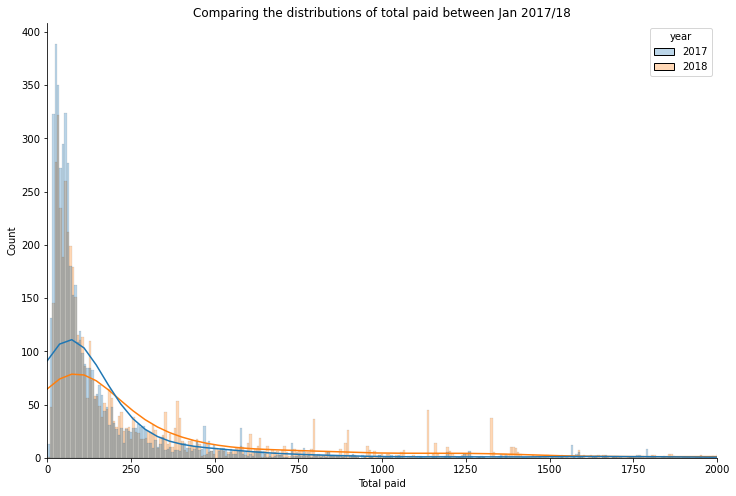

In [14]:
plt.subplots(figsize=(12, 8))

sns.histplot(data=p_df_jan, x='total_paid', hue='year', 
             alpha=.3, # add transparency to you chart
             kde=True, # add a density line in the histogram
             bins=1000 # define the number of bins the variable total paid will be grouped
            )

plt.xlim(0, 2000)
plt.title('Comparing the distributions of total paid between Jan 2017/18')
plt.xlabel('Total paid')
sns.despine() # remove the top and right margin, to make your plot prettier 
plt.show()

Looking at this distributions, we can see that in 2017 there have been more orders with a `total_paid` smaller than in 2018. While in 2018 we have several spikes between 1000 and 1500, which indicates that there are more orders with a higer price in average. 

Let's check this hypothesis: 

In [15]:
p_df_jan.groupby('year').agg({'total_paid':['mean','median','std']})

total_paid              
           mean median    std
year                         
2017     233.11  72.96 522.33
2018     376.94 112.97 665.62

My theory is confirmed when we aggregate the data. The standard deviation for 2018 also shows us that there is a higher dispersion compared to 2017, caused mainly but these orders around 1250 euros.

Let's see if we can zoom in into the products information for january. 

In [16]:
# we already have the completed orders for January of both year in our p_df_jan, let's it to locate them on the orderlines file
p_sku_jan = (
orderlines
    # filter all the orders id in orderlines for month of january (2017 and 2018)
    .loc[orderlines['id_order'].isin(p_df_jan['order_id'])]
    .assign(year = orderlines['date'].dt.strftime('%Y'))
    .groupby(['year','sku'])
    .agg({'unit_price':'sum'})
    .reset_index()
    .sort_values('unit_price', ascending=False)
    .groupby('year')
    .head(10)
)
p_sku_jan

,year,sku,unit_price
2370,2018,APP2490,57099.45
2371,2018,APP2491,50301.34
2255,2018,APP2074,50154.26
2369,2018,APP2489,45337.70
2373,2018,APP2492,38541.00
2425,2018,APP2637,35826.00
3456,2018,PAC2119,25979.77
2256,2018,APP2075,23829.55
1323,2017,PAC1240,21966.00
3463,2018,PAC2136,20970.90


In [17]:
p_sku_jan = p_sku_jan.merge(products, how='left')
p_sku_jan

,year,sku,unit_price,name,desc,price,type,max_price_orderlines
0,2018,APP2490,57099.45,Apple iPhone 64GB X Silver,New Apple iPhone 64GB Free Silver X,NaN,113271716,1159.00
1,2018,APP2491,50301.34,Apple iPhone X 256GB Space Gray,New Apple iPhone X 256GB Free Space Gray,NaN,113271716,1329.00
2,2018,APP2074,50154.26,"Apple MacBook Pro 15 ""Core i7 Touch Bar 28GHz ...",New MacBook Pro 15-inch Touch Bar to 28GHz Cor...,2805.59,"1,02E+12",NaN
3,2018,APP2489,45337.70,Apple iPhone 64GB Space Gray X,New Free iPhone 64GB X,1159.00,113271716,NaN
4,2018,APP2492,38541.00,Apple iPhone X 256GB Silver,New Apple iPhone X 256GB Silver Free,NaN,113271716,1329.00
5,2018,APP2637,35826.00,"Apple iMac Pro 27 ""8-core Intel Xeon W 32GHz |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,5499.00,118692158,NaN
6,2018,PAC2119,25979.77,"Apple iMac 27 ""Core i7 Retina 5K 42GHz | 32GB ...",IMac desktop computer 27 inch Retina 5K RAM 32...,3799.00,"5,74E+15",NaN
7,2018,APP2075,23829.55,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,3305.59,"1,02E+12",NaN
8,2017,PAC1240,21966.00,"Apple MacBook Pro 133 ""i5 25GHz | RAM 16GB | 5...",Apple MacBook Pro 133 inches (MD101Y / A) with...,1899.00,1282,NaN
9,2018,PAC2136,20970.90,"Apple iMac 27 ""Core i5 Retina 5K 34GHz | 16GB ...",IMac desktop computer 27 inch 5K Retina 16GB (...,2339.00,"5,74E+15",NaN


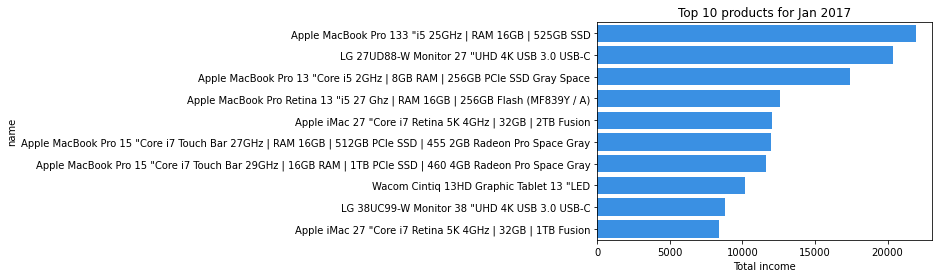

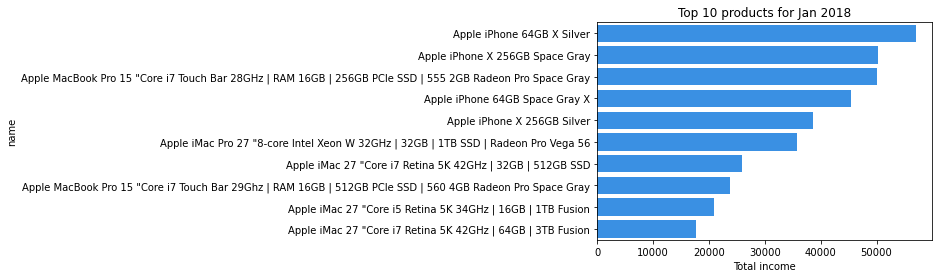

In [18]:
for year in ['2017', '2018']:
    temp = p_sku_jan.loc[p_sku_jan['year'] == year]
    sns.barplot(data=temp, x='unit_price', y='name', color='dodgerblue')
    plt.title('Top 10 products for Jan ' + year)
    plt.xlabel('Total income')
    plt.show()

The [product mix](https://en.wikipedia.org/wiki/Marketing_mix) of the company has changed across the two years. Also the revenue!

Let's do a step back and see if I can find more information about the evolution of mean and median order value across the months:

In [19]:
p_df=(
orders_compl
     .assign(
        # we can create periods of time, in that case year and mont periods. 
        # I recommend you look more in deep and the documentaion of `to_period`
        year_month = orders_compl['created_date'].dt.to_period(freq='M')
    )
    # group by year and month period to find the mean and median value
     .groupby('year_month')
     .agg({'total_paid':['mean','median']})
     .reset_index()
    
)

In [20]:
# rename columns to make it easier to call them on the plot
p_df.columns = ['year_month','mean','median']

In [21]:
p_df

,year_month,mean,median
0,2017-01,233.11,72.96
1,2017-02,274.48,94.97
2,2017-03,573.95,106.98
3,2017-04,298.38,89.99
4,2017-05,341.52,115.00
5,2017-06,430.47,137.98
6,2017-07,327.86,110.97
7,2017-08,307.26,109.99
8,2017-09,395.04,131.78
9,2017-10,346.99,122.24


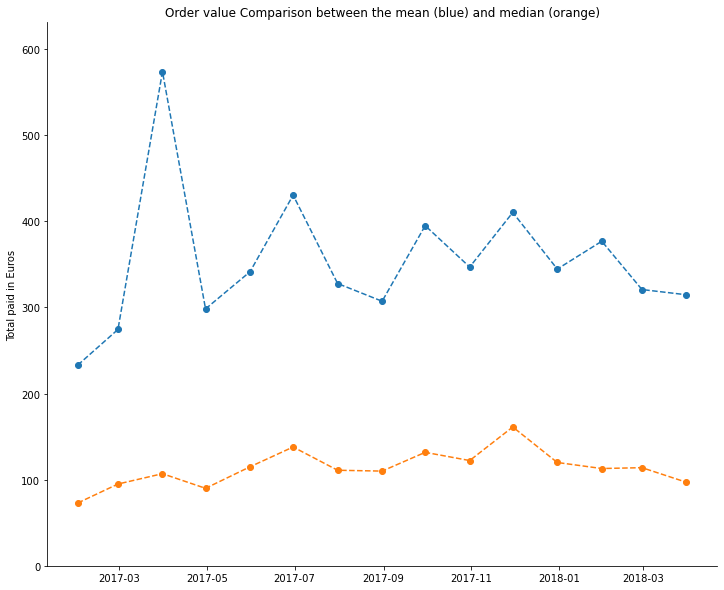

In [22]:
plt.subplots(figsize=(12, 10))

# seaborn and matplotlib works with layers, so you can put one on top of each other.
# using a for look will help us to print as many plots as we want on top of each other
for measure in ['mean','median']: 
    # plot_date help us to plot datetime plots, as it can understand datetime formats like periods
    plt.plot_date(data=p_df, x='year_month', y=measure, linestyle='--')

plt.title('Order value Comparison between the mean (blue) and median (orange)')
plt.xlabel('')
plt.ylabel('Total paid in Euros')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, p_df['mean'].max() * 1.1)
sns.despine()
plt.show()

Which are the main conclusions we can extract from this graph? Which is the difference between using the mean and the median?

## Looking for a correlation between shipping cost, total price and quantity of products by each order 

Is there a correlation between the number of products acquired and the shipping cost? 

In [23]:
p_df = (
orderlines
    .groupby(['id_order'])
    .agg({'total_price':'sum', 
         'product_quantity':'sum'})
    .reset_index()
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .query('state == "Completed"')
    # lambda function inside assign help us to call a variable create on the pandas pipeline
    # further explanation below
    .assign(ship_cost = lambda x: x['total_paid'] - x['total_price'])
    # exclude orders with no shippping cost
    .query('ship_cost != 0')
    .groupby('id_order')
    .agg({'ship_cost':'sum',
         'total_price':'sum', 
         'product_quantity':'sum'})
    .sort_values('product_quantity')
)

In [24]:
# Example how to understand a lambda function inside assign

# create a dummy dataframe
temp = pd.DataFrame({
    'a':[1,2,3],
    'b':[2,3,4]
})

# example how it is applied
print('Example 1:')
print(
temp
    .assign(a_plus_b = temp['a'] + temp['b'])
    # the only way to call the variable x_y in the same data pipeline is to use 
    # a lambda function, as the variable x_y do not exist on the original dataframe
    .assign(a_and_a_plus_b = lambda x: x['a'] + x['a_plus_b'])
)

# this process will be exaclty as doing
print('\nExample 2:')
one = temp.assign(a_plus_b = temp['a'] + temp['a'])
# in this example I can call the variable as temp['x_y'] as I overwrited the object temp in the line above
print(one.assign(a_and_a_plus_b = one['a'] + one['a_plus_b']))

Example 1:
   a  b  a_plus_b  a_and_a_plus_b
0  1  2         3               4
1  2  3         5               7
2  3  4         7              10

Example 2:
   a  b  a_plus_b  a_and_a_plus_b
0  1  2         2               3
1  2  3         4               6
2  3  4         6               9


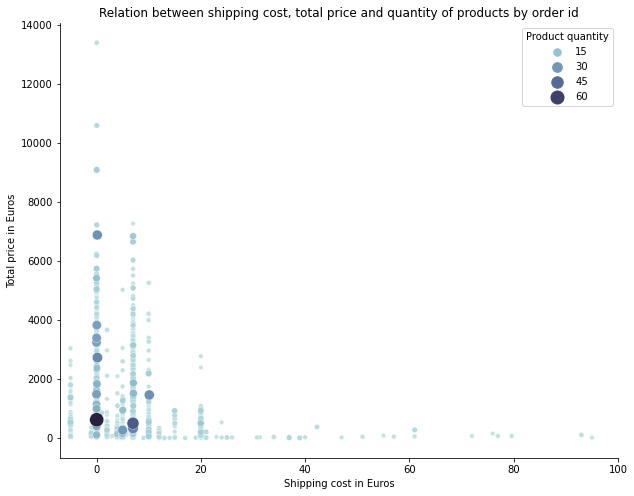

In [25]:
plt.subplots(figsize=(10, 8))

sns.scatterplot(data=p_df, x='ship_cost', y='total_price', 
                hue='product_quantity', 
                size='product_quantity', # define the size of each point based on the variable product quantity
                sizes=(20, 200), # range of size of the size variable
                palette='ch:start=.2,rot=-.3') # define manually the range of colors

plt.xlabel('Shipping cost in Euros')
plt.ylabel('Total price in Euros')
plt.title('Relation between shipping cost, total price and quantity of products by order id')
plt.legend(title = 'Product quantity') # Change the title name of the legend
plt.xlim(-7, 100)
sns.despine()
plt.show()

## CHALLENGE

Answer the following questions with the chart you consider better: 

1. Only a fraction of the total number of orders end up being completed. Let's call this fraction (Completed orders / Total number of orders) 'Orders Conversion Rate'. Can you plot the weekly evolution of the 'Orders Conversion Rate'? Find the best chart to represent it. 

HINT: Trends throughout time are best represented by lines. Search how to do line plots with Seaborn.

In [26]:
orders_compl = orders.query('state == "Completed"')

In [27]:
orders['week'] =   orders['created_date'].dt.strftime('%U')# create two new columns in our dataframe; year and month
orders['status'] = orders.state.str.contains('Completed')
orders
#orders.sort_values('week', ascending= True).agg('status' == 'completed')


,order_id,created_date,total_paid,state,check_orders,week,status
0,241319,2017-01-02 13:35:40,44.99,Cancelled,True,01,False
1,241423,2017-11-06 13:10:02,136.15,Completed,True,45,True
2,242832,2017-12-31 17:40:03,15.76,Completed,True,53,True
3,243330,2017-02-16 10:59:38,84.98,Completed,True,07,True
4,243784,2017-11-24 13:35:19,157.86,Cancelled,True,47,False
...,...,...,...,...,...,...,...
204686,527397,2018-03-14 13:56:38,42.99,Place Order,True,10,False
204687,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True,10,False
204688,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True,10,False
204689,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True,10,False


In [28]:
p_df = (
orders
    # create two new columns in our dataframe; year and month
    .assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'),
           week = orders['created_date'].dt.strftime('%U'))
    # get the total paid by each year and month
)
#p_df  
p_df_new = (
p_df
    .query('year== "2017"')
    .filter(['order_id', 'state', 'week', 'year', 'month'])
    .groupby(['week'])
    .agg({'state':'count'})
    .sort_values('week', ascending = True)  
    .reset_index()
)
p_df_new

p_df_status = (
p_df
    .query('state == "Completed"')
    .query('year== "2017"')
    .filter(['order_id', 'state', 'week', 'year', 'month'])
    .groupby(['week'])
    .agg({'state':'count'})
    .sort_values('week', ascending = True)  
    .reset_index()
)
p_df_status



p_df_status_new = p_df_new.merge(p_df_status, how = 'left', on = 'week')

#p_df['count_number'] = p_df.index
#p_df['count_number'] =p_df['count_number'].astype(float)




In [29]:
conversion_percent =(
p_df_status_new  
        .assign(conversion_rate = lambda x: ((x['state_y'] /x['state_x']) * 100))
)
conversion_percent


,week,state_x,state_y,conversion_rate
0,01,4413,1204,27.28
1,02,4588,1338,29.16
2,03,3189,964,30.23
3,04,3125,1036,33.15
4,05,3122,957,30.65
5,06,2547,658,25.83
6,07,3160,845,26.74
7,08,2707,356,13.15
8,09,2741,44,1.61
9,10,2058,31,1.51


In [30]:
p_df_2018 = (
orders
    # create two new columns in our dataframe; year and month
    .assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'),
           week = orders['created_date'].dt.strftime('%U'))
    # get the total paid by each year and month
)
#p_df  
p_df_2018_new= (
p_df_2018
    .query('year== "2018"')
    .filter(['order_id', 'state', 'week', 'year', 'month'])
    .groupby(['week'])
    .agg({'state':'count'})
    .sort_values('week', ascending = True)  
    .reset_index()
)
p_df_2018_new

p_df_status_2018 = (
p_df_2018
    .query('state == "Completed"')
    .query('year== "2018"')
    .filter(['order_id', 'state', 'week', 'year', 'month'])
    .groupby(['week'])
    .agg({'state':'count'})
    .sort_values('week', ascending = True)  
    .reset_index()
)
p_df_status_2018



p_df_status_new_2018 = p_df_2018_new.merge(p_df_status_2018, how = 'left', on = 'week')

In [31]:
conversion_percent_2018 =(
p_df_status_new_2018  
        .assign(conversion_rate = lambda x: ((x['state_y'] /x['state_x']) * 100))
)
conversion_percent_2018

,week,state_x,state_y,conversion_rate
0,00,5077,1253,24.68
1,01,5509,1256,22.80
2,02,4410,972,22.04
3,03,4091,905,22.12
4,04,4843,1132,23.37
5,05,3764,795,21.12
6,06,3587,973,27.13
7,07,3126,743,23.77
8,08,3293,881,26.75
9,09,4136,780,18.86


NameError: name 'ax' is not defined

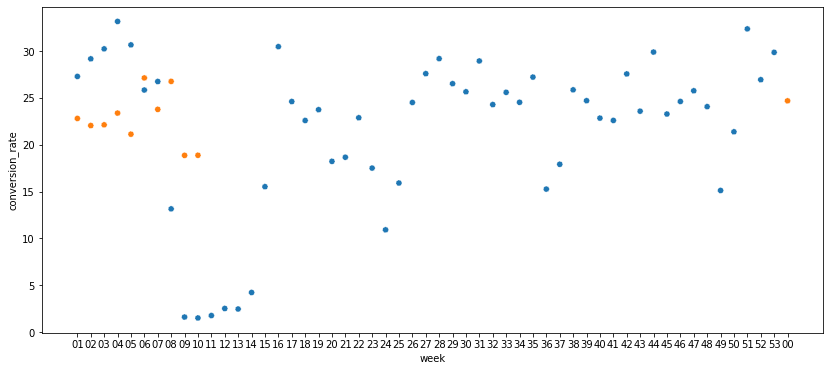

In [32]:
plt.subplots(figsize=(14, 6))

p = sns.scatterplot(data=conversion_percent, x='week', y='conversion_rate',linestyle='--')
    # dataframe we will use to look for the columns information
t =  sns.scatterplot(data=conversion_percent_2018, x='week', y='conversion_rate',linestyle='--')
    # group color in our chart
#    plt.plot_date(data=p_df, x='year_month', y=measure, linestyle='--')
vals = ax.get_yticks()
sns.lineplot(data=conversion_percent, x='week', y='conversion_rate')
sns.lineplot(data=conversion_percent_2018, x='week', y='conversion_rate')
plt.xlabel('Week') # x label name
plt.ylabel('conversion_rate') # y label name
#plt.axis([0,60, 0, 40])
plt.title('Conversion_rate') # title
#plt.legend('2017 2018')
plt.tight_layout()
#ax.set(xlim=(0, 60))
sns.despine()
#plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() #



If you combine the unit prices from the products dataframe with the unit price in orderlines, you can find if a discount has been applied into a product and how much is the difference. Find out which are the best visualisation to: 

1. Show the evolution of the average discount (in %) by each month

In [36]:
#orderlines

products_order_completed =pd.read_csv('D:\Bootcamp Data Science\Bootcamp\Projects\Code\products_order_completed.csv')

products_order_completed

,id,order_id,product_quantity,sku,unit_price,date,unit_price_total,name,desc,in_stock,price_new1,short,category,long,created_date,total_paid,state
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,1.00,60.99,OWC,Storage,OWC,2017-01-01 01:51:47,51.48,Completed
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0.00,22.95,IOT,Others,iOttie,2017-01-01 01:57:34,18.99,Completed
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1.00,89.00,APP,Apple Products,Apple,2017-01-01 02:02:38,72.19,Completed
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,0.00,3209.00,PAC,Storage,Pack,2017-01-02 10:00:20,2565.99,Completed
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,0.00,76.99,CRU,Storage,Crucial,2017-01-01 02:30:08,65.89,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62098,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,0.00,24.99,TUC,Others,Tucano,2018-03-14 11:56:19,85.73,Completed
62099,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1.00,25.00,APP,Apple Products,Apple,2018-03-14 11:50:48,24.97,Completed
62100,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1.00,25.00,APP,Apple Products,Apple,2018-03-14 11:51:42,24.97,Completed
62101,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1.00,25.00,APP,Apple Products,Apple,2018-03-14 11:58:40,34.96,Completed


In [41]:

average_discount = (
average_discount
    # create year and month
    .assign( year_month = products_order_completed['date'].dt.to_period(freq='M')) 
           
           #month = orders['created_date'].dt.strftime('%b'))
)

average_discount_cleaning = average_discount.drop_duplicates(subset = 'sku')
average_discount_cleaning
a_df=(
average_discount_cleaning
    .filter(['id_order','month','year'])
    .groupby(['year','month'])
    .agg({'unit_price' : ['mean'], 'price_new1' : ['mean']})
    .sort_values('year', ascending = False)
    .reset_index()
)
a_df_percent =(
a_df
    .assign(percent = lambda x: (((x['price_new1'] - x['unit_price'])/x['price_new1'] * 100)))
)
a_df_percent


AttributeError: Can only use .dt accessor with datetimelike values

In [38]:
a_df_percent.columns =['year', 'month','price_new1','unit_price','percent']

NameError: name 'a_df_percent' is not defined

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.subplots(figsize=(14, 10))



    # plot_date help us to plot datetime plots, as it can understand datetime formats like periods
sns.barplot(data=a_df_percent, x='month', y='percent', hue ='year', order= months)

plt.xlabel('month') # x label name
plt.ylabel('percent') # y label name
plt.title('Discount_percent') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() #

In [ ]:
a_df_percent_cl.columns =['year', 'month','price','unit_price','percent']

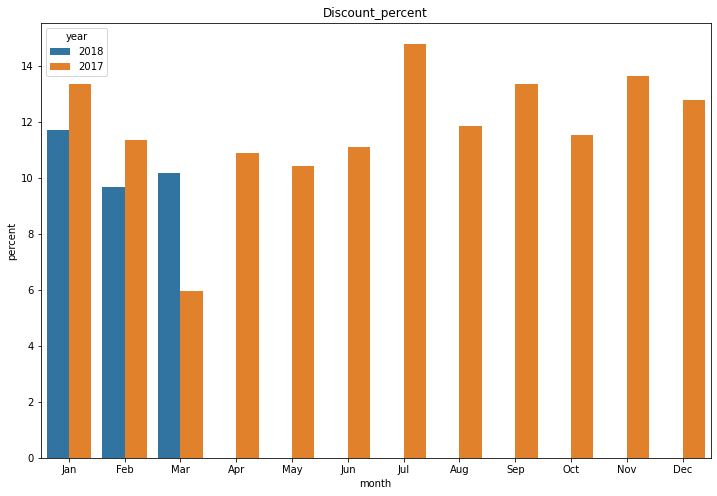

In [39]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.subplots(figsize=(12, 8))



    # plot_date help us to plot datetime plots, as it can understand datetime formats like periods
sns.lineplot(data=a_df_percent_cl, x='month', y='percent', hue ='year', order= months)

plt.xlabel('month') # x label name
plt.ylabel('percent') # y label name
plt.title('Discount_percent') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() #

2. Show the top 30 products with the highest discounts in absolute values, on average.  

In [42]:
#with my clean data
a_df=(
average_discount
    .filter(['sku','unit_price','month','year','price_new'])
    .groupby(['year','month','sku'])
    .agg({'unit_price' : ['mean'], 'price_new' : ['mean']})
    .sort_values('year', ascending = False)
    .reset_index()
)
a_df

,year,month,sku,unit_price,price_new
,,,,mean,mean
0,2018,Mar,ZAG0035,15.99,39.99
1,2018,Jan,APP0995,2072.91,2255.59
2,2018,Jan,APP0901,1010.59,1105.59
3,2018,Jan,APP0909,634.79,675.59
4,2018,Jan,APP0910,870.60,915.59
...,...,...,...,...,...
38443,2017,Jan,SAT0026,24.99,34.99
38444,2017,Jan,SAT0027,29.99,39.99
38445,2017,Jan,SAT0028,44.99,54.99


In [49]:
a_df_discounts =(
a_df
    .assign(discounts = lambda x: ((x['price_new'] - x['unit_price'])))
    .sort_values('discounts', ascending = False)  
)   

a_df_discounts

,year,month,unit_price,price_new,discounts
,,,mean,mean,
1,2018,Jan,906.43,6066.36,5159.94
13,2017,Oct,566.44,1320.22,753.78
5,2017,Dec,709.33,1444.75,735.42
14,2017,Sep,689.59,1325.20,635.61
11,2017,May,683.32,1270.56,587.24
4,2017,Aug,870.29,1420.07,549.78
8,2017,Jul,965.50,1507.65,542.14
12,2017,Nov,543.70,962.04,418.34
2,2018,Mar,287.43,566.62,279.19


NameError: name 'a_df_discount_30' is not defined

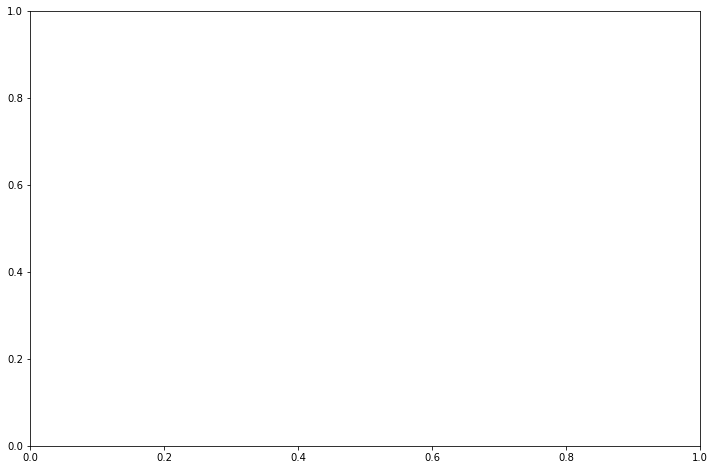

In [48]:
plt.subplots(figsize=(12, 8))



    # plot_date help us to plot datetime plots, as it can understand datetime formats like periods
sns.barplot(data=a_df_discounts, x='sku', y='discounts', hue ='year')
#plt.ylim(0, 1000)
plt.xlabel('sku') # x label name
plt.ylabel('dicounts') # y label name
plt.title('Discount_absolute') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() #

In [53]:
#with instructors clean data
a_df_cl=(
average_discount_cl
    .filter(['sku','unit_price','month','year','price'])
    .groupby(['year','month','sku'])
    .agg({'unit_price' : ['mean'], 'price' : ['mean']})
    .sort_values('year', ascending = False)
    .reset_index()
)
a_df_cl

,year,month,sku,unit_price,price
,,,,mean,mean
0,2018,Mar,ZAG0035,15.99,39.99
1,2018,Jan,APP1008,2362.73,2569.00
2,2018,Jan,APP0927,17.23,35.00
3,2018,Jan,APP0930,1464.59,1579.00
4,2018,Jan,APP0933,1266.59,1339.00
...,...,...,...,...,...
38459,2017,Jan,SAT0039,58.83,69.99
38460,2017,Jan,SAT0040,29.62,NaN
38461,2017,Jan,SAT0041,29.99,39.99


In [69]:
a_df_discounts_cl =(
a_df_cl
    .assign(discounts = lambda x: ((x['price'] - x['unit_price'])))
    .sort_values('discounts', ascending = False)  
)   
a_df_discount_30_cl = a_df_discounts_cl.head(30)
a_df_discount_30_cl

,year,month,sku,unit_price,price,discounts
,,,,mean,mean,
20085,2017,Dec,PAC2122,1960.91,4519.00,2558.09
26739,2017,Aug,PAC2133,4192.56,6199.00,2006.44
36168,2017,Jul,APP0821,4099.00,6089.00,1990.00
3783,2018,Mar,APP1956,803.55,2769.00,1965.45
10004,2017,Mar,PAC0874,9499.99,11129.00,1629.01
22435,2017,Feb,PAC0874,9499.99,11129.00,1629.01
3994,2018,Mar,APP2348,2380.97,3999.00,1618.03
5331,2018,Jan,LAC0223,8287.80,9799.00,1511.20
20291,2017,Dec,PAC0504,6029.99,7529.00,1499.01


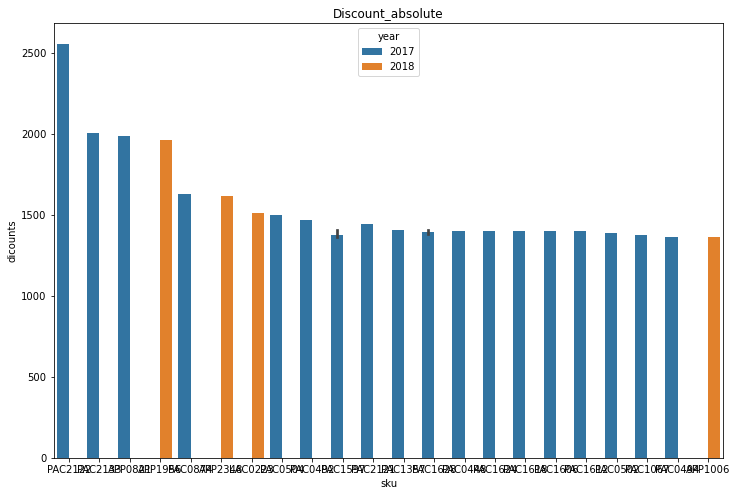

In [70]:
plt.subplots(figsize=(12, 8))



    # plot_date help us to plot datetime plots, as it can understand datetime formats like periods
sns.barplot(data=a_df_discount_30_cl, x='sku', y='discounts', hue ='year')

plt.xlabel('sku') # x label name
plt.ylabel('dicounts') # y label name
plt.title('Discount_absolute') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() #

3. Show the distributions of discounts for each brand. Choose the discount measure you consider better to compare all brands. HINT: you can use the first 3 characters of the sku name to merge it with the brands table.

In [94]:
average_discount_cl['short'] = average_discount_cl.sku.str[:3]

In [103]:
average_discount_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,name,desc,price,type,max_price_orderlines,year,month,short
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,11865403,NaN,2017,Jan,OTT
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,1296,NaN,2017,Nov,LGE
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,11905404,NaN,2017,Dec,PAR
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,12655397,NaN,2017,Feb,WDT
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,5398,NaN,2017,Nov,JBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293738,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,5384,NaN,NaN,NaN,JBL
293739,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,1433,NaN,NaN,NaN,PAC
293740,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1230,NaN,NaN,NaN,APP
293741,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,13835403,NaN,NaN,NaN,BEZ


In [104]:
brands_merge = average_discount_cl.merge(brands , how = 'left', on = 'short')

In [110]:
brands_merge

,id,id_order,sku,unit_price,total_price,check_orders,name,desc,price,year,month,short,long
0,1119109,299539,OTT0133,18.99,18.99,True,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,2017,Jan,OTT,Otterbox
1,1119110,299540,LGE0043,399.00,399.00,True,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,2017,Nov,LGE,LG
2,1119111,299541,PAR0071,474.05,474.05,True,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,2017,Dec,PAR,Parrot
3,1119112,299542,WDT0315,68.39,68.39,True,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,2017,Feb,WDT,Western Digital
4,1119113,299543,JBL0104,23.74,23.74,True,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,2017,Nov,JBL,JBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293738,1650199,527398,JBL0122,42.99,42.99,True,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,NaN,NaN,JBL,JBL
293739,1650200,527399,PAC0653,141.58,141.58,True,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,NaN,NaN,PAC,Pack
293740,1650201,527400,APP0698,9.99,19.98,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,NaN,NaN,APP,Apple
293741,1650202,527388,BEZ0204,19.99,19.99,True,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,NaN,NaN,BEZ,Be.ez


In [155]:

brands_merge = brands_merge.assign(discount_percent = lambda x: (((x['price'] - x['unit_price'])/x['price'] * 100)))
        

brands_merge


,id,id_order,sku,unit_price,total_price,check_orders,name,desc,price,year,month,short,long,discounts,discount_percent
0,1119109,299539,OTT0133,18.99,18.99,True,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,2017,Jan,OTT,Otterbox,45.73,45.73
1,1119110,299540,LGE0043,399.00,399.00,True,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,2017,Nov,LGE,LG,6.99,6.99
2,1119111,299541,PAR0071,474.05,474.05,True,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,2017,Dec,PAR,Parrot,32.18,32.18
3,1119112,299542,WDT0315,68.39,68.39,True,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,2017,Feb,WDT,Western Digital,13.43,13.43
4,1119113,299543,JBL0104,23.74,23.74,True,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,2017,Nov,JBL,JBL,20.60,20.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293738,1650199,527398,JBL0122,42.99,42.99,True,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,NaN,NaN,JBL,JBL,13.93,13.93
293739,1650200,527399,PAC0653,141.58,141.58,True,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,NaN,NaN,PAC,Pack,34.45,34.45
293740,1650201,527400,APP0698,9.99,19.98,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,NaN,NaN,APP,Apple,60.04,60.04
293741,1650202,527388,BEZ0204,19.99,19.99,True,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,NaN,NaN,BEZ,Be.ez,33.34,33.34


In [156]:
brands_merge_discount = (
brands_merge
    .filter(['sku', 'unit_price','price','year','month', 'long','discounts'])
    .groupby(['long']) 
    .agg({'unit_price':'mean', 'price':'mean', 'discounts':'mean'})  #.sort_values('discounts', ascending= False)
    .sort_values('long', ascending= False)
)

In [157]:
brands_merge_discount

,unit_price,price,discounts
long,,,
iOttie,22.43,28.52,22.45
iHealth,54.24,66.44,6.96
iFrogz,18.66,19.99,6.67
iFixit,37.19,42.29,9.06
Zepp,131.62,149.99,12.25
...,...,...,...
Akitio,242.26,278.07,10.15
Aiino,17.25,30.87,44.85
Adonit,39.06,46.07,11.45
